In [66]:

from collections import Counter
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from scipy.stats import normaltest



In [89]:

df = pd.read_csv('../../Preprocessing/final_with_emmys.csv')

# Categorical columns
categorical_columns = [
    'genre', 'country', 'language', 
     'production_company_df1',
]

# Numerical columns
numerical_columns = [
     'duration_df1', 'avg_vote', 'votes', 'revenue_with_CPI', 
    'converted_budget', 
    'dir_oscar_nomination', 'dir_oscar_won', 'writer_oscar_nomination', 'writer_oscar_won', 
    'cast_oscar_nomination', 'cast_oscar_won', 'dir_globe_nomination', 'dir_globe_won', 'cast_globe_nomination', 
   'cast_globe_won', 'actors_films_before', 'director_films_before', 'writers_films_before', 
    'BAFTA_nominees', 'BAFTA_awards',
    'dir_emmy_nom','dir_emmy_won','writer_emmy_won','writer_emmy_nom','act_emmy_nom','act_emmy_won'
]


categorical_df = df[categorical_columns]
numerical_df = df[numerical_columns]

df=df[numerical_columns+categorical_columns]
print("Categorical DataFrame:")
print(categorical_df.head())

print("\nNumerical DataFrame:")
print(numerical_df.head())


Categorical DataFrame:
                 genre country language production_company_df1
0         Crime, Drama     USA  English                  Other
1                Drama     USA  English                  Other
2  Drama, History, War     USA  English                  Other
3                Drama     USA  English                  Other
4     Adventure, Crime  France   French                  Other

Numerical DataFrame:
   duration_df1  avg_vote  votes  revenue_with_CPI  converted_budget  \
0          88.0        61   5270        55484317.0          175700.3   
1          59.0        64   8590       331523495.5         3013850.0   
2          77.0        61   2180         4139975.0          521727.6   
3          50.0        46   5540       223938744.3         5598468.6   
4         300.0        74   8140        48986600.3        10802441.1   

   dir_oscar_nomination  dir_oscar_won  writer_oscar_nomination  \
0                     0              0                        0   
1         

In [90]:
# Missing Values Analysis
print("\nMissing Values Analysis:")
print(numerical_df.isnull().sum())
print(categorical_df.isnull().sum())


Missing Values Analysis:
duration_df1                 0
avg_vote                     0
votes                        0
revenue_with_CPI             0
converted_budget           119
dir_oscar_nomination         0
dir_oscar_won                0
writer_oscar_nomination      0
writer_oscar_won             0
cast_oscar_nomination        0
cast_oscar_won               0
dir_globe_nomination         0
dir_globe_won                0
cast_globe_nomination        0
cast_globe_won               0
actors_films_before          0
director_films_before        0
writers_films_before         0
BAFTA_nominees               0
BAFTA_awards                 0
dir_emmy_nom                 0
dir_emmy_won                 0
writer_emmy_won              0
writer_emmy_nom              0
act_emmy_nom                 0
act_emmy_won                 0
dtype: int64
genre                       0
country                     5
language                  106
production_company_df1      0
dtype: int64


In [91]:

df.dropna(subset=['converted_budget'], inplace=True)


# Numerical Features

In [92]:

# Basic Descriptive Statistics for Numerical Columns
print("Descriptive Statistics for Numerical Columns:")
print(numerical_df.describe())


Descriptive Statistics for Numerical Columns:
       duration_df1      avg_vote         votes  revenue_with_CPI  \
count  20778.000000  20778.000000  2.077800e+04      2.077800e+04   
mean     103.951872     60.132159  3.157736e+05      1.002295e+08   
std       21.507513     11.927524  9.906257e+05      2.866202e+08   
min       41.000000     10.000000  1.000000e+03      1.200000e+00   
25%       90.000000     54.000000  3.790000e+03      1.072334e+06   
50%      100.000000     62.000000  1.819000e+04      1.387147e+07   
75%      112.000000     68.000000  1.586750e+05      8.165596e+07   
max      808.000000     94.000000  2.159628e+07      8.813185e+09   

       converted_budget  dir_oscar_nomination  dir_oscar_won  \
count      2.065900e+04          20778.000000   20778.000000   
mean       3.573183e+07              0.115218       0.025941   
std        6.672804e+07              0.597848       0.189616   
min        0.000000e+00              0.000000       0.000000   
25%        3

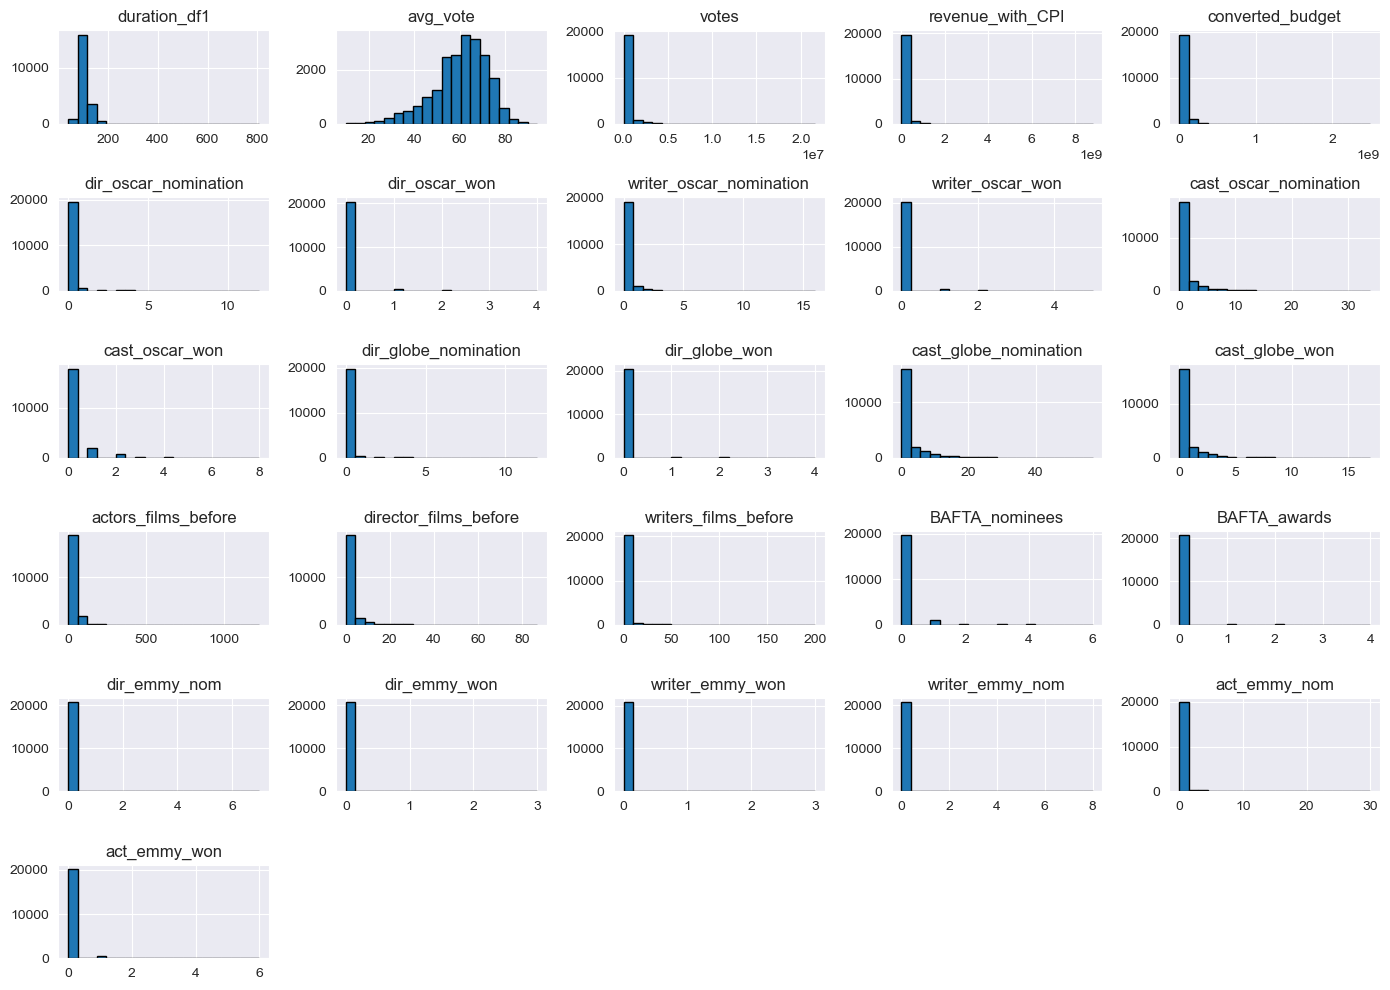

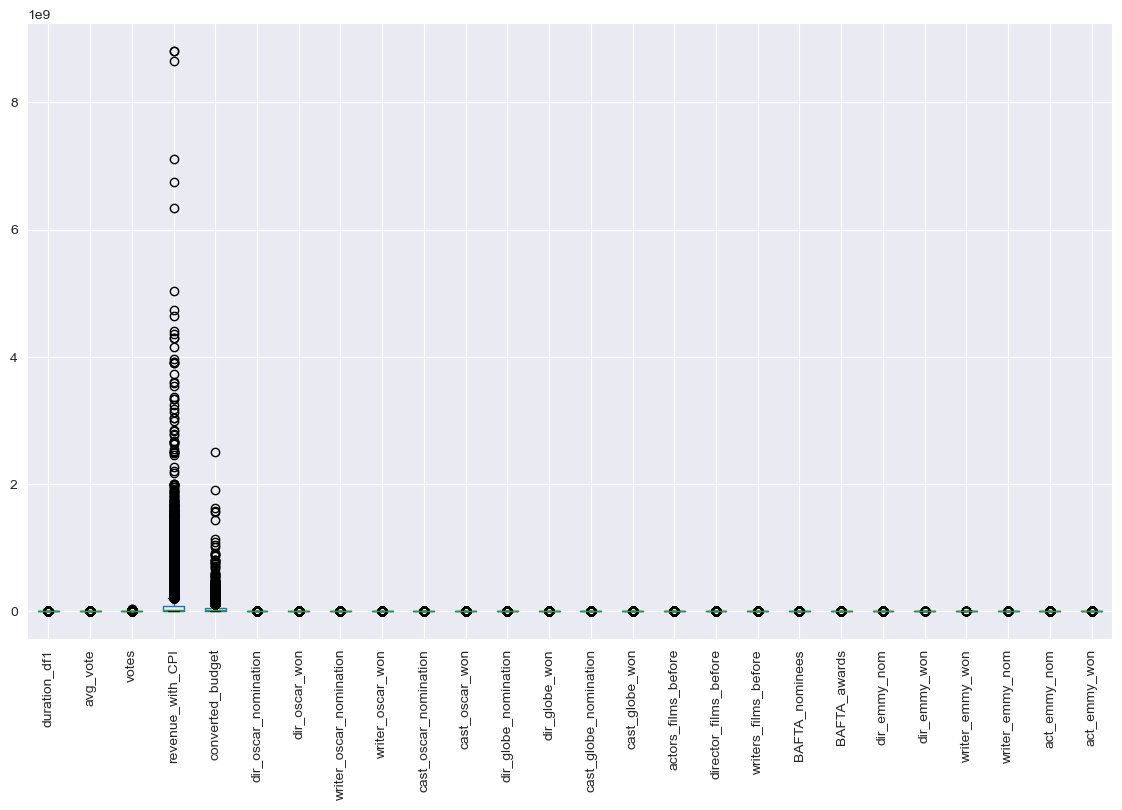

In [93]:
# Histograms for Numerical Columns
numerical_df.hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

# Boxplots for Numerical Columns
plt.figure(figsize=(14, 8))
numerical_df.boxplot()
plt.xticks(rotation=90)
plt.show()



<Figure size 1400x1000 with 0 Axes>

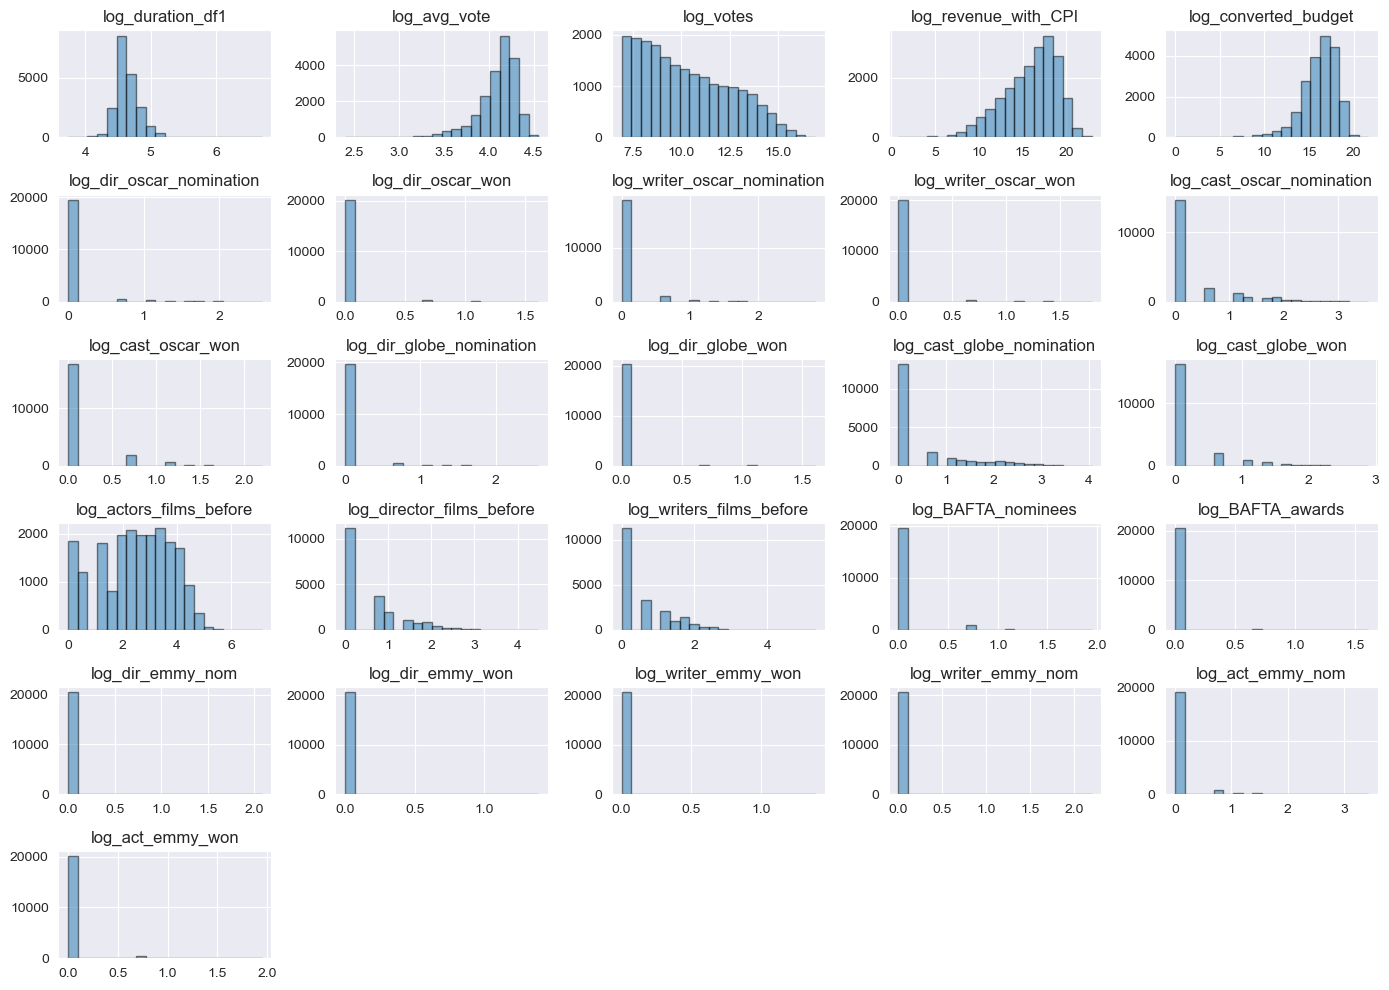

<Figure size 1400x1000 with 0 Axes>

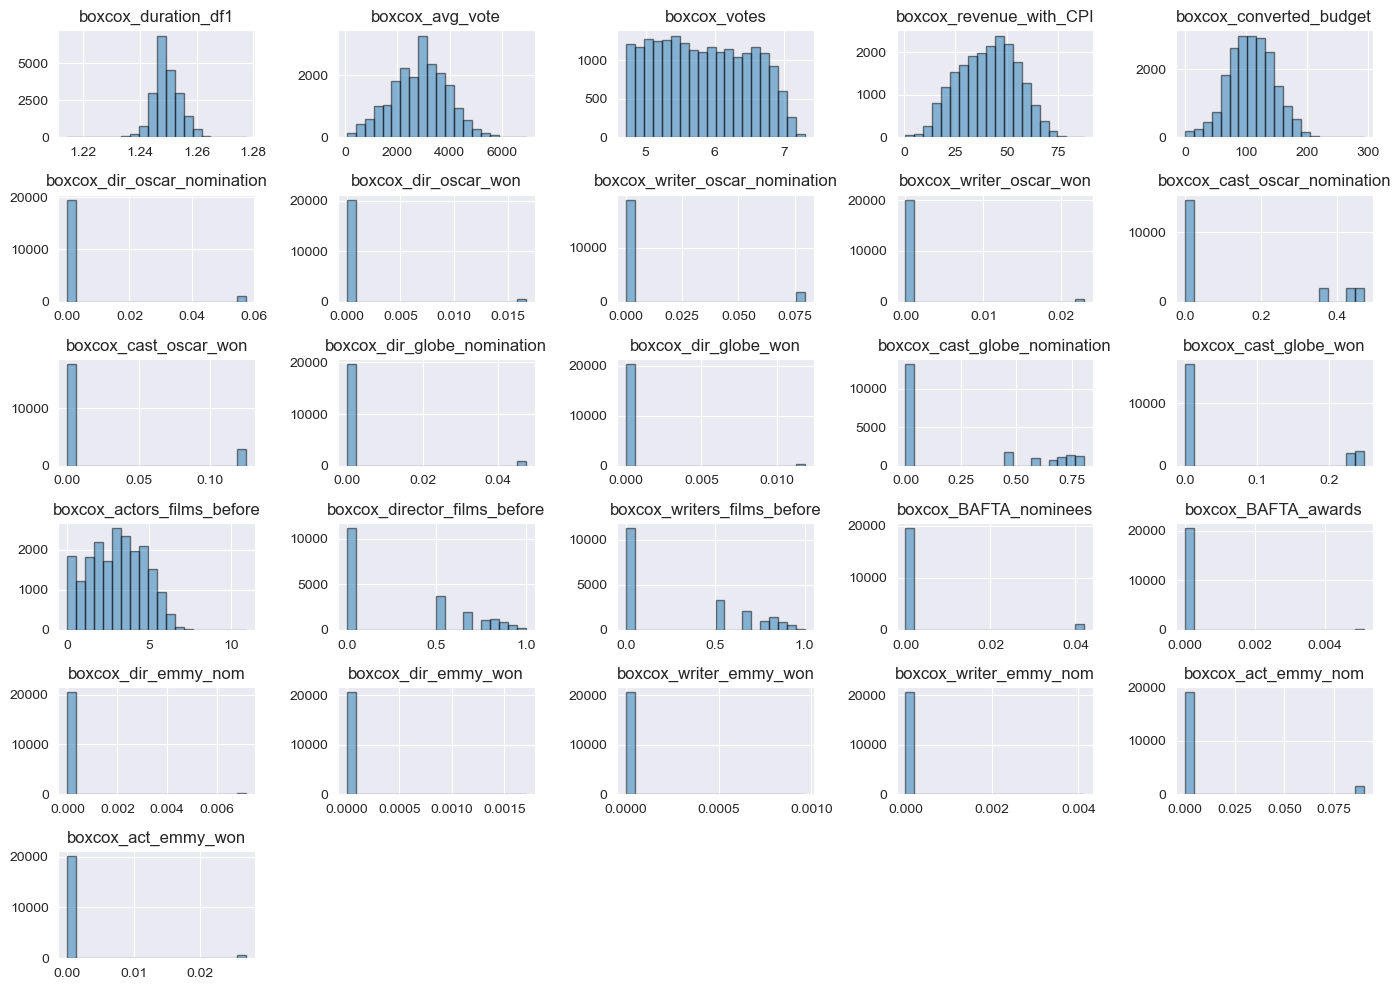

In [94]:

# log transformation to the skewed numerical columns
for col in numerical_columns:
    df[f'log_{col}'] = np.log1p(df[col])  # Adding 1 to avoid log(0)

# Visualize the transformed data (log transformation)
log_transformed_columns = [f'log_{col}' for col in numerical_columns]

# Box-Cox transformation to the skewed numerical columns
for col in numerical_columns:
    if df[col].min() >= 0: 
        transformed_data, _ = boxcox(df[col]+1)
        df[f'boxcox_{col}'] = transformed_data

# Visualize the Box-Cox transformed data
boxcox_transformed_columns = [f'boxcox_{col}' for col in numerical_columns]

# Plot histograms for Log Transformed Numerical Columns
plt.figure(figsize=(14, 10))
df[log_transformed_columns].hist(figsize=(14, 10), bins=20, edgecolor='black', alpha=0.5)
plt.tight_layout()
plt.show()

# Plot histograms for Box-Cox Transformed Numerical Columns
plt.figure(figsize=(14, 10))
df[boxcox_transformed_columns].hist(figsize=(14, 10), bins=20, edgecolor='black', alpha=0.5)
plt.tight_layout()
plt.show()



In [95]:
# Normality tests for transformed data
print("Normality tests for transformed data:")
for col in log_transformed_columns + boxcox_transformed_columns:
    stat, p = normaltest(df[col].dropna())
    print(f'{col}:')
    print(f'   Normality test statistic: {stat}')
    print(f'   p-value: {p}')
    if p < 0.05:
        print("   Data does not appear to be normally distributed.")
    else:
        print("   Data appears to be normally distributed.")


Normality tests for transformed data:
log_duration_df1:
   Normality test statistic: 3321.5373468388166
   p-value: 0.0
   Data does not appear to be normally distributed.
log_avg_vote:
   Normality test statistic: 7741.416476748862
   p-value: 0.0
   Data does not appear to be normally distributed.
log_votes:
   Normality test statistic: 2662.2647025136407
   p-value: 0.0
   Data does not appear to be normally distributed.
log_revenue_with_CPI:
   Normality test statistic: 1837.653782239658
   p-value: 0.0
   Data does not appear to be normally distributed.
log_converted_budget:
   Normality test statistic: 9399.19308083963
   p-value: 0.0
   Data does not appear to be normally distributed.
log_dir_oscar_nomination:
   Normality test statistic: 19848.69555455127
   p-value: 0.0
   Data does not appear to be normally distributed.
log_dir_oscar_won:
   Normality test statistic: 26207.135799114378
   p-value: 0.0
   Data does not appear to be normally distributed.
log_writer_oscar_nomina

C:\Users\BOLO\miniconda3\envs\Business\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


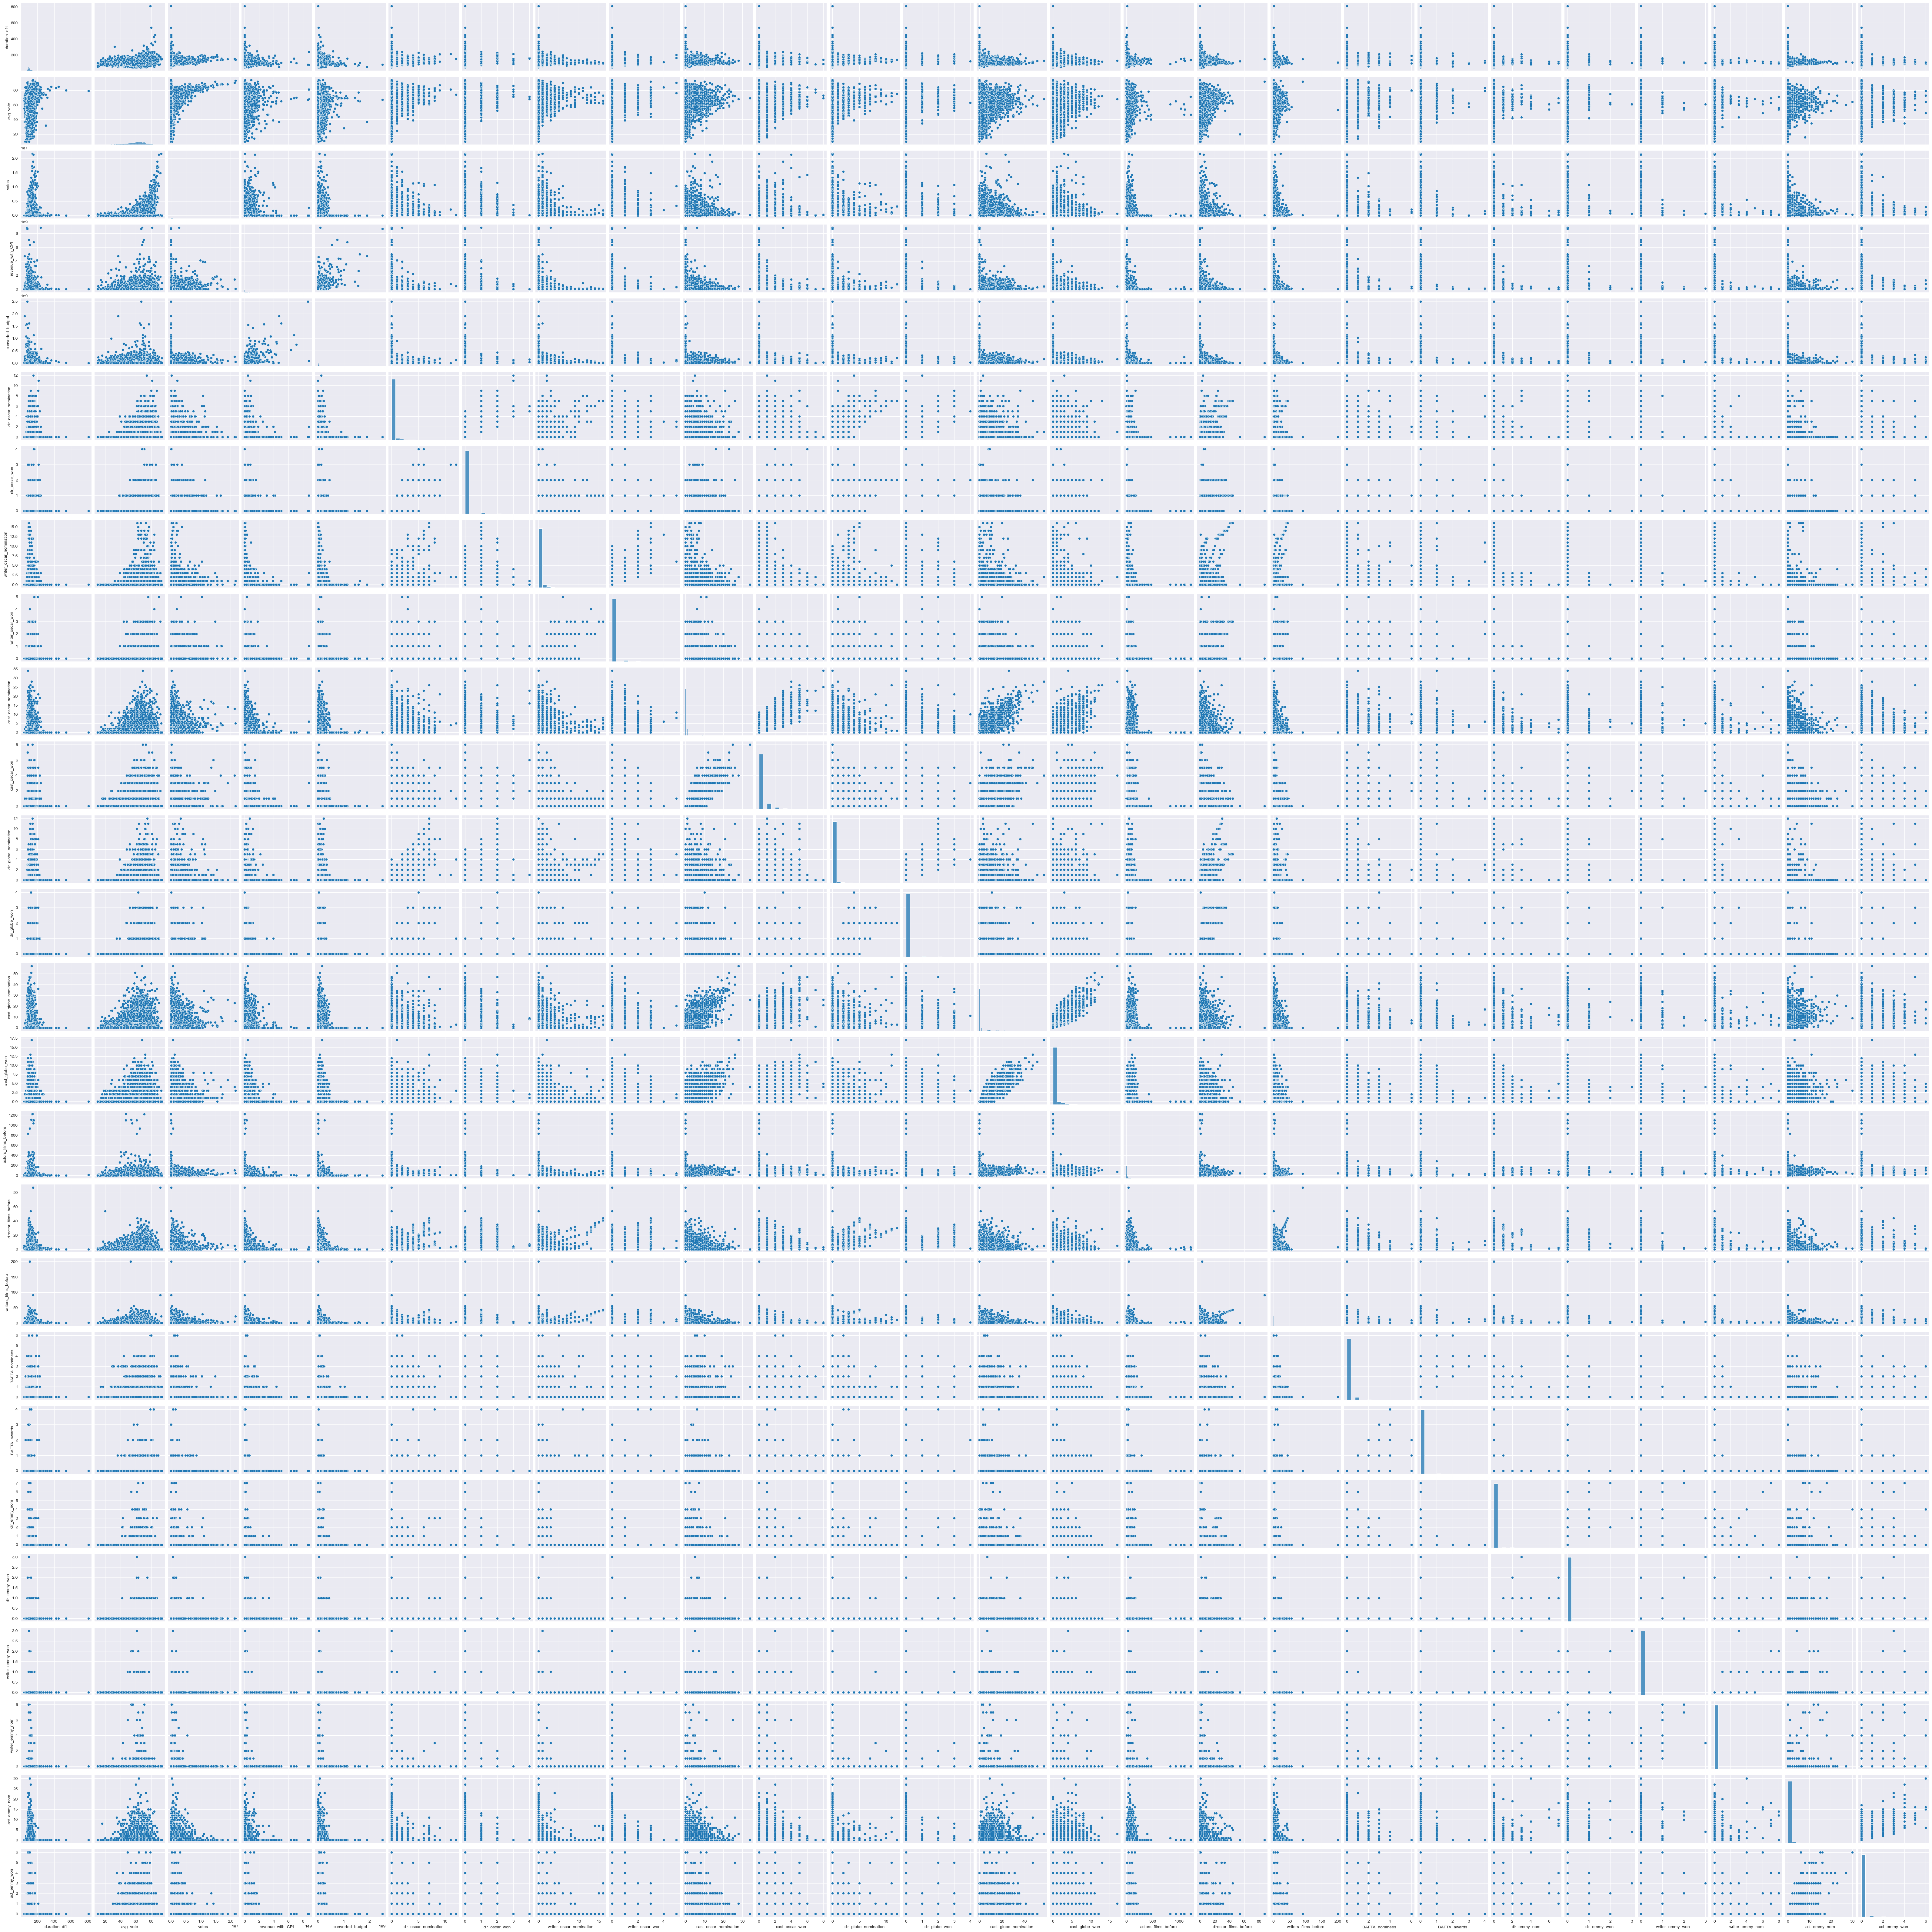

In [96]:

# Scatter Plots for Numerical Columns Pairs
sns.pairplot(df[numerical_columns].dropna())
plt.show()



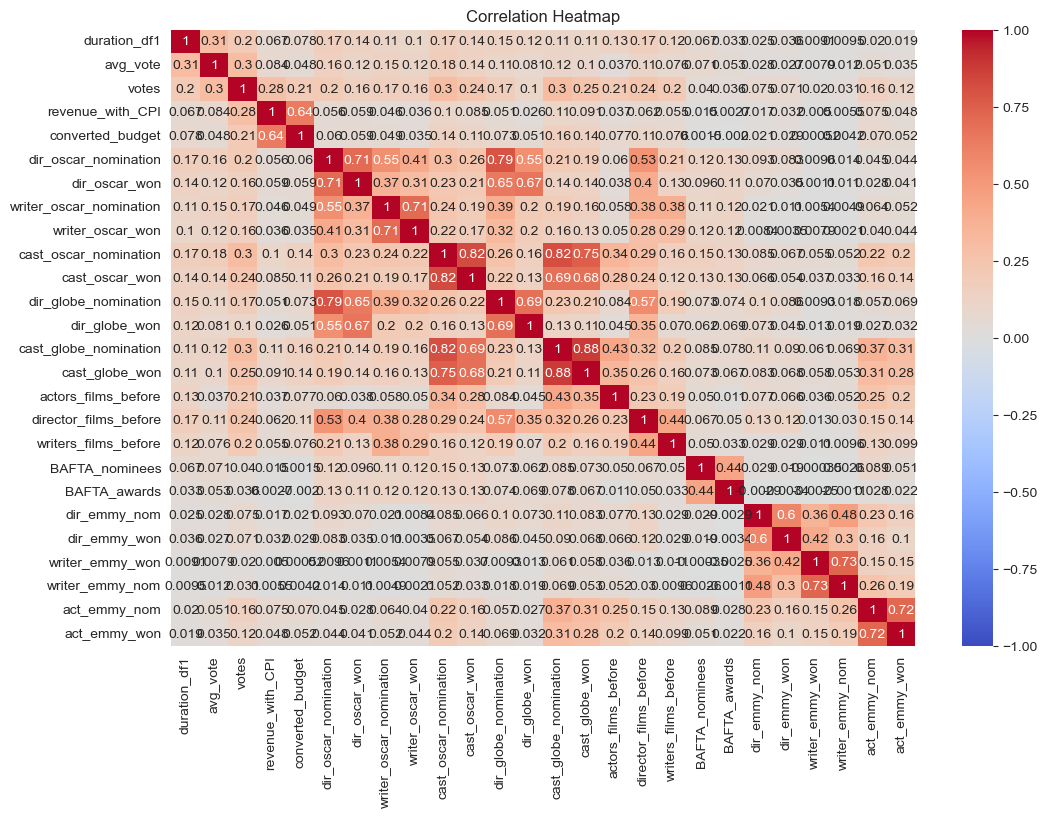

In [97]:

# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()



# Categorical Features

In [98]:
# Descriptive Statistics for Categorical Columns
print("\nDescriptive Statistics for Categorical Columns:")
for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(categorical_df[col].value_counts().head(10))  # Show top 10 most frequent categories



Descriptive Statistics for Categorical Columns:

Column: genre
genre
Drama                     2412
Comedy                    1557
Comedy, Drama             1012
Drama, Romance             769
Comedy, Drama, Romance     711
Comedy, Romance            666
Action, Crime, Drama       430
Horror                     406
Crime, Drama, Thriller     329
Horror, Thriller           326
Name: count, dtype: int64

Column: country
country
USA        9089
Other      4012
UK         1636
France     1534
India      1065
Germany     765
Canada      626
Italy       608
Japan       552
Spain       550
Name: count, dtype: int64

Column: language
language
English     12691
Other        2969
French       1227
Spanish       862
Hindi         566
German        545
Japanese      528
Italian       500
Russian       443
Turkish       341
Name: count, dtype: int64

Column: production_company_df1
production_company_df1
Other                    17267
Warner                     678
Universal                  623
So

In [99]:

# Mantieni solo il primo elemento in ogni cella delle colonne 'language' e 'country'
df['language'] = df['language'].str.split(', ').str[0]
df['country'] = df['country'].str.split(', ').str[0]

# Conta i valori unici nelle colonne 'language' e 'country'
language_counts = df['language'].value_counts()
country_counts = df['country'].value_counts()

# Mantieni solo i primi 15 valori più comuni e sostituisci gli altri con 'Other'
#top_languages = language_counts.head(15).index
#top_countries = country_counts.head(15).index

#df.loc[~df['language'].isin(top_languages), 'language'] = 'Other'
#df.loc[~df['country'].isin(top_countries), 'country'] = 'Other'



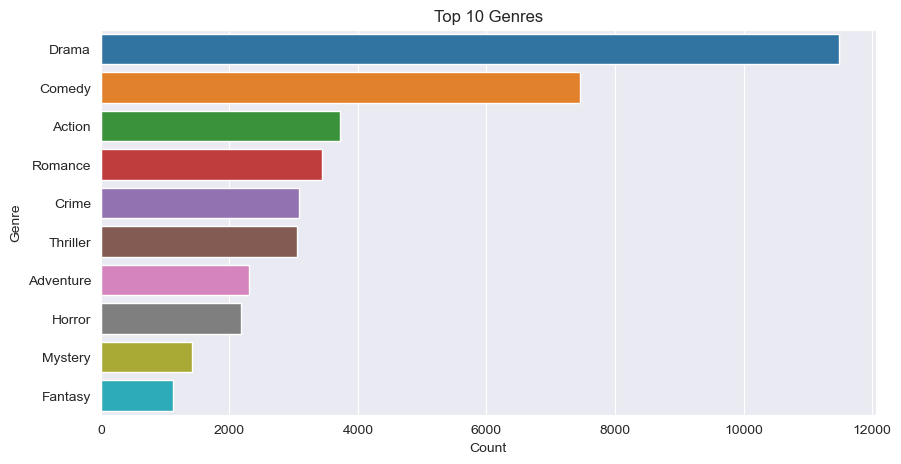

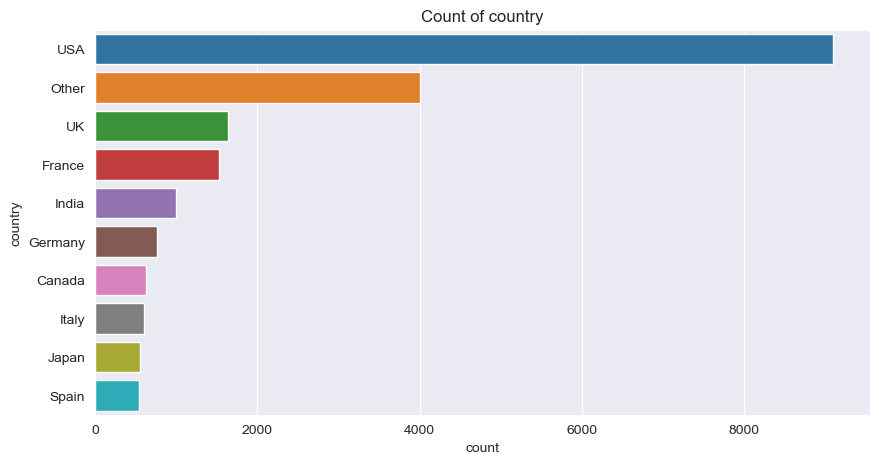

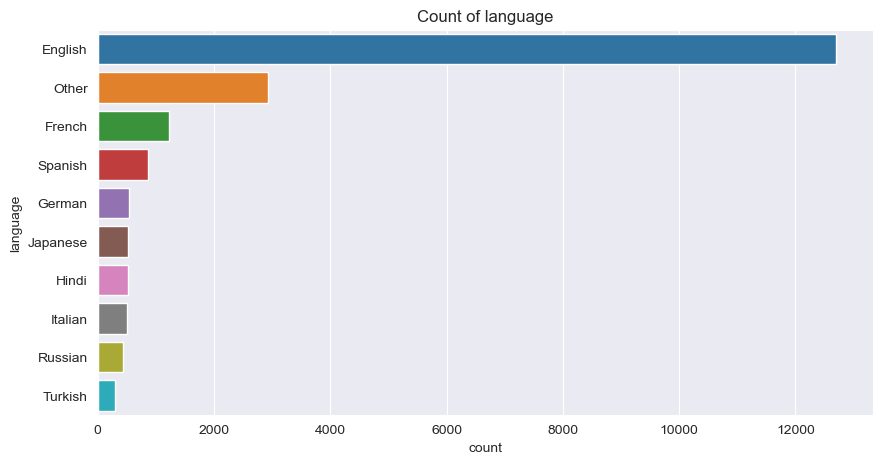

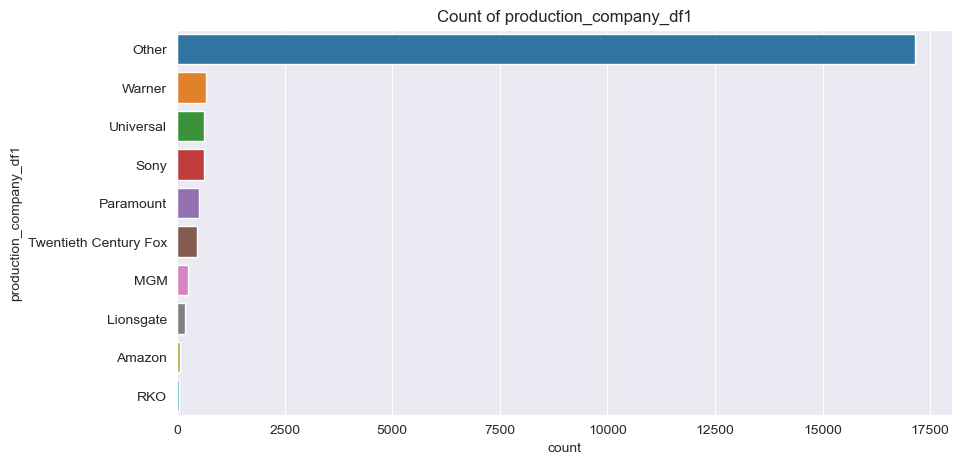

In [100]:
# Split the genre column into individual genres
all_genres = df['genre'].dropna().str.split(', ').sum()
genre_counts = Counter(all_genres)

genre_df = pd.DataFrame(genre_counts.items(), columns=['genre', 'count']).sort_values(by='count', ascending=False)

# Plot the top 10 genres
plt.figure(figsize=(10, 5))
sns.barplot(data=genre_df.head(10), x='count', y='genre')
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

# Plot counts for other categorical columns
for col in categorical_columns:
    if col != 'genre':  
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10])  # Show top 10 categories
        plt.title(f'Count of {col}')
        plt.show()

In [101]:

# Lista per memorizzare i risultati del test del chi-quadro
chi2_results = []

# Esegui il test del chi-quadro per ogni coppia di colonne categoriche
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:  # Evita di confrontare una colonna con se stessa
            # Crea una tabella di contingenza tra le due colonne
            contingency_table = pd.crosstab(df[col1], df[col2])
            
            # Esegui il test del chi-quadro
            chi2, p_value, _, _ = chi2_contingency(contingency_table)
            
            # Aggiungi i risultati alla lista
            chi2_results.append((col1, col2, chi2, p_value))

# Stampa i risultati del test del chi-quadro
for result in chi2_results:
    print(f"Chi-square test between {result[0]} and {result[1]}:")
    print(f"  Chi-square value: {result[2]}")
    print(f"  p-value: {result[3]}\n")


Chi-square test between genre and country:
  Chi-square value: 13600.662102094406
  p-value: 0.0

Chi-square test between genre and language:
  Chi-square value: 12362.525199129585
  p-value: 0.0

Chi-square test between genre and production_company_df1:
  Chi-square value: 10954.400961356981
  p-value: 3.675222076601855e-105

Chi-square test between country and genre:
  Chi-square value: 13600.662102094404
  p-value: 0.0

Chi-square test between country and language:
  Chi-square value: 98072.7475778929
  p-value: 0.0

Chi-square test between country and production_company_df1:
  Chi-square value: 3378.234441269509
  p-value: 0.0

Chi-square test between language and genre:
  Chi-square value: 12362.525199129585
  p-value: 0.0

Chi-square test between language and country:
  Chi-square value: 98072.74757789288
  p-value: 0.0

Chi-square test between language and production_company_df1:
  Chi-square value: 2303.6142368064056
  p-value: 0.0

Chi-square test between production_company_df

In [52]:
# Dizionario per memorizzare il numero di outlier per ogni colonna
outlier_counts_iqr = {}

# Ciclo su tutte le colonne numeriche
for col in numerical_columns:
    # Seleziona la colonna e rimuovi i valori nulli
    data = df[col].dropna()
    
    # Calcola il primo e il terzo quartile
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    # Calcola l'IQR
    iqr = q3 - q1
    
    # Definisci la soglia per individuare gli outlier
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Individua gli outlier utilizzando l'IQR
    outliers_iqr = data[(data < lower_bound) | (data > upper_bound)]
    
    # Conta il numero di outlier e aggiungilo al dizionario
    outlier_counts_iqr[col] = len(outliers_iqr)

# Stampare il numero di outlier per ogni colonna utilizzando l'IQR
for col, count in outlier_counts_iqr.items():
    print(f"Colonna '{col}': {count} outlier")


Colonna 'duration_df1': 884 outlier
Colonna 'avg_vote': 596 outlier
Colonna 'votes': 3359 outlier
Colonna 'revenue_with_CPI': 2636 outlier
Colonna 'converted_budget': 1864 outlier
Colonna 'dir_oscar_nomination': 1161 outlier
Colonna 'dir_oscar_won': 440 outlier
Colonna 'writer_oscar_nomination': 1697 outlier
Colonna 'writer_oscar_won': 569 outlier
Colonna 'cast_oscar_nomination': 2730 outlier
Colonna 'cast_oscar_won': 2927 outlier
Colonna 'dir_globe_nomination': 930 outlier
Colonna 'dir_globe_won': 279 outlier
Colonna 'cast_globe_nomination': 2745 outlier
Colonna 'cast_globe_won': 4326 outlier
Colonna 'actors_films_before': 1127 outlier
Colonna 'director_films_before': 1517 outlier
Colonna 'writers_films_before': 1522 outlier
Colonna 'BAFTA_nominees': 1096 outlier
Colonna 'BAFTA_awards': 139 outlier
